In [2]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import subprocess
import scipy as sc
from itertools import product

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.figsize": (4, 3.5),
    "text.latex.preamble": "\n".join([
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        r"\usepackage[detect-all,locale=FR]{siunitx}",
    ]),
    'lines.markersize': 10,
    'lines.color': 'grey',
    'scatter.marker': '+',
    'errorbar.capsize': 3,
    'savefig.bbox': 'tight',
})

In [3]:
path = '../'
executable = 'bin/ex2'
export_path = path + 'rapport/figures/'
data_path = 'data/'
config_path = 'bin/'
config_name = 'no_excitation'
config_ext = '.conf'

In [4]:
def stringify_dict(d: dict, sep=',') -> str:
    return sep.join(map(lambda a: str(a[0]) + "=" + str(a[1]), tuple(d.items())))

In [5]:
def run(config_file: str, output_file: str, params: dict = {}) -> None:
    # print(f"Running with config file {config_file}")
    options = stringify_dict(params, sep=' ')
    cmd = f"{path}{executable} {path}{config_file} output='{path}{output_file}' {options}"
    print(f"Running command `{cmd}`")
    subprocess.run(cmd, shell=True, stdout=subprocess.DEVNULL)
    # print("Done")

In [6]:
nsteps = np.array([*range(200, 2001, 100)])
nsimul = len(nsteps)  # Number of simulations to perform

conf = {}
with open(path + config_path + config_name + config_ext, 'r') as f:
    lines = f.read().split('\n')

for line in lines:
    if not line:
        continue
    name, _, val, *_ = line.split(' ')
    name = name.strip()
    val = val.strip()
    try:
        conf[name] = float(val)
    except ValueError:
        conf[name] = val

# 3 periodes
omega0 = np.sqrt(conf['g']/conf['L'])
tFin = 6 * np.pi / omega0
dt = tFin / (3 * nsteps)
assert conf['tFin'] == tFin
tFin

2.691420879279824

In [7]:
def analytical_theta(t: float) -> float:
    return conf['theta0'] * np.cos(omega0 * t)

In [8]:
def analytical_thetadot(t: float) -> float:
    return -omega0 * conf['theta0'] * np.sin(omega0 * t)

In [9]:
%%bash
cd .. && make clean && make

clang++ -o bin/ex2 src/Ex2_2024_student.cpp -std=c++17 -Wall -Wextra -O2 


In [10]:
params_variations = {
    'nsteps': nsteps,
}
all_params = tuple(
    {a: b for a, b in zip(params_variations.keys(), c)} for c in product(*params_variations.values())
)

# Run simulations
outputs = []  # List to store output file names
for params in all_params:
    output_file = f"{data_path}{config_name},{stringify_dict(params)}.out"
    outputs.append(output_file)
    run(f'{config_path}{config_name}{config_ext}', output_file, params)

Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=200.out' nsteps=200`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=300.out' nsteps=300`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=400.out' nsteps=400`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=500.out' nsteps=500`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=600.out' nsteps=600`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=700.out' nsteps=700`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=800.out' nsteps=800`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=900.out' nsteps=900`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=1000.out' nst

In [11]:
# Filter stuff
file_and_params = []

for file, params in zip(outputs, all_params):
    file_and_params.append((file, params))

file_and_params

[('data/no_excitation,nsteps=200.out', {'nsteps': 200}),
 ('data/no_excitation,nsteps=300.out', {'nsteps': 300}),
 ('data/no_excitation,nsteps=400.out', {'nsteps': 400}),
 ('data/no_excitation,nsteps=500.out', {'nsteps': 500}),
 ('data/no_excitation,nsteps=600.out', {'nsteps': 600}),
 ('data/no_excitation,nsteps=700.out', {'nsteps': 700}),
 ('data/no_excitation,nsteps=800.out', {'nsteps': 800}),
 ('data/no_excitation,nsteps=900.out', {'nsteps': 900}),
 ('data/no_excitation,nsteps=1000.out', {'nsteps': 1000}),
 ('data/no_excitation,nsteps=1100.out', {'nsteps': 1100}),
 ('data/no_excitation,nsteps=1200.out', {'nsteps': 1200}),
 ('data/no_excitation,nsteps=1300.out', {'nsteps': 1300}),
 ('data/no_excitation,nsteps=1400.out', {'nsteps': 1400}),
 ('data/no_excitation,nsteps=1500.out', {'nsteps': 1500}),
 ('data/no_excitation,nsteps=1600.out', {'nsteps': 1600}),
 ('data/no_excitation,nsteps=1700.out', {'nsteps': 1700}),
 ('data/no_excitation,nsteps=1800.out', {'nsteps': 1800}),
 ('data/no_ex

# Plots!

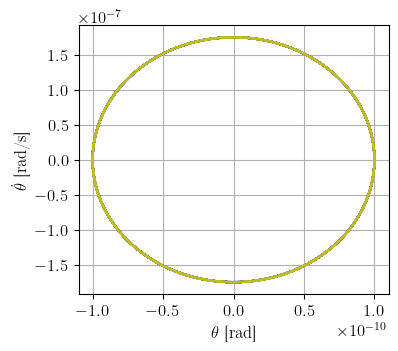

In [38]:
for (file, params) in file_and_params:
    data = np.loadtxt(path + file)
    t, theta, thetadot = data[:,0], data[:,1], data[:,2]
    # p = m L^2 thetadot
    plt.plot(theta, thetadot / (conf['m'] * conf['L']**2))

# plt.axis('equal')
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'$\dot{\theta}$ [rad/s]')
plt.grid()
# plt.legend()

## Position error

In [13]:
pos_errors = np.zeros(nsimul)
speed_errors = np.zeros(nsimul)
for i, (file, params) in enumerate(file_and_params):
    data = np.loadtxt(path + file)
    tf, thetaf, thetadotf = data[-1,0], data[-1,1], data[-1,2]
    actual_theta = analytical_theta(tf)
    actual_thetadot = analytical_thetadot(tf)
    pos_errors[i] = abs(actual_theta - thetaf)
    speed_errors[i] = abs(actual_thetadot - thetadotf)

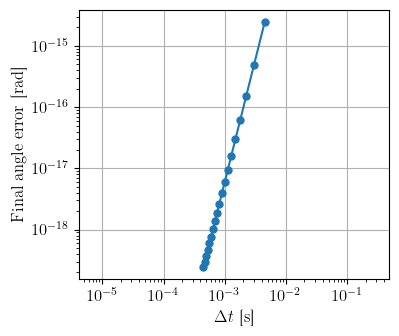

In [37]:
plt.loglog(dt, pos_errors, '.-', label='Pos')

plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'Final angle error [rad]')
plt.xticks()
plt.yticks()
plt.grid()
# plt.legend()
plt.axis('equal')
plt.savefig(export_path + 'no_excitation_pos_conv.pdf')

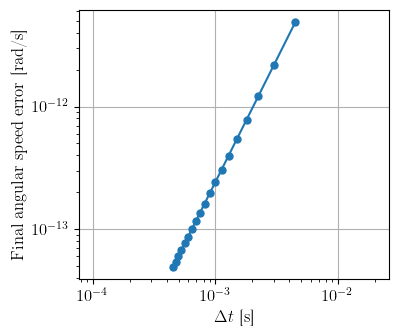

In [18]:
plt.loglog(dt, speed_errors, '.-', label='Speed')
# plt.loglog(dt, dt**2)

plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'Final angular speed error [rad/s]')
plt.xticks()
plt.yticks()
plt.grid()
# plt.legend()
plt.axis('equal')
plt.savefig(export_path + 'no_excitation_vel_conv.pdf')